## **Objective** -  *Data Manipulation, Understanding, and Visualization on NYC Taxi Trip Duration Dataset*

---



### **Dataset Description**: *This dataset is based on the 2016 NYC Yellow Cab trip record data*

**Train.csv File contains the following Fields -**


1. **id** - a unique identifier for each trip
2. **vendor_id** - a code indicating the provider associated with the trip **record**
3. **pickup_datetime** - date and time when the meter was engaged
4. **dropoff_datetime** - date and time when the meter was disengaged
5. **passenger_count** - the number of passengers in the vehicle (driver entered value)
6. **pickup_longitude** - the longitude where the meter was engaged
7. **pickup_latitude** - the latitude where the meter was engaged
8. **dropoff_longitude** - the longitude where the meter was disengaged
9. **dropoff_latitude** - the latitude where the meter was disengaged
10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
11. **trip_duration** - duration of the trip in seconds


# **Data Exploration** - Understanding the Data & its Structure

In [1]:
# Importing all the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# Reading the Dataset as a pandas Dataframe

df = pd.read_csv('train.csv')
df.head() #This displays the first five entries of the data - Helps To get an Idea of how the data looks

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info() #Gives General Metadata -  Helps understand the type of data we are dealing with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**There are 6 Numerical Data Fields** - *Vendor ID, Passenger Count, Pickup_Longitude, Pickup_Latitude, Dropoff_Longitude, Dropoff_Laitude*

**There are 3 Objects Data Fields** - *ID, Pickup_DateTime & Dropoff_Datetime*

In [4]:
old_shape = df.shape
old_shape  # Give the Number of Rows and Columns in our Dataset.

(1458644, 11)

In [5]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64



---


There are a no missing values in our Dataset.


---




In [6]:
df.dropna(inplace = True) # Dropping all the null values if any
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.duplicated().sum() # No Duplicate values exist in the dataset

0

# **Data Transformation** - Preparing the Data for Analysis

In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435




> As we can see, all the ID's are unique, hence we will drop the 'id' column



In [9]:
unique = df['id'].unique()
total_ids = len(df['id'])
print(len(unique))
print(total_ids)


df.drop(columns='id', axis=1, inplace=True) #dropping the ID column in the original dataset.

1458644
1458644


In [10]:
df.head() # Here's the updated Data Frame

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
# Converting 'pickup_datetime' and 'dropoff_datetime' from string to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 111.3+ MB


**Pickup and Dropoff datetime are now converted to DateTime Format**

# **Analysis and Visualization** - Identifying Patterns & Graphical Representation

*Using* **Passenger Count** *as our Target Variable to Perform Analysis and draw Insights*

In [14]:
print('Number of Trips\n',df['passenger_count'].value_counts().sort_index()) # Number of Trips per Passenger Count

Number of Trips
 passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: count, dtype: int64


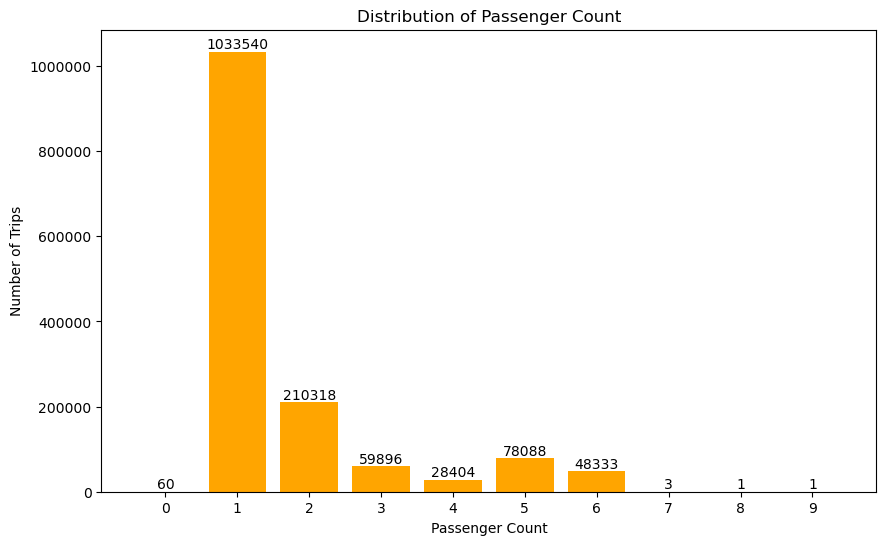

In [15]:
passenger_counts = df['passenger_count'].value_counts().sort_index().loc[0:9]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(passenger_counts.index, passenger_counts.values, color='orange')  # Orange bars


# Format y-axis to show exact values
plt.ticklabel_format(axis='y', style='plain')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.xticks(passenger_counts.index)  # Ensure x-ticks are aligned with bars
plt.show()

1) **From this Graph we can deduce that People usually travel by themselves and Occasionally with one more Person. Reasoning -  The most frequent number of passengers per trip is 1. This is followed by 2 and 3 passengers per trip.**


2) **People Generally Book a Taxi more in less Numbers. Reasoning - The number of trips decreases as the number of passengers per trip increases.**


3) **This suggests that there is a negative correlation between the two variables.**



---

---





*Using* **Vendor ID** *as our Target Variable to Perform Analysis and draw Insights*

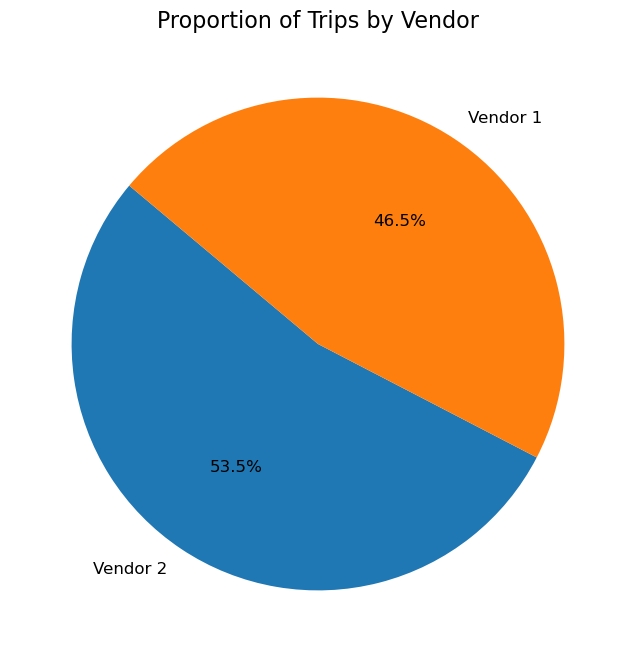

In [16]:
vendor_counts = df['vendor_id'].value_counts()
# Replace the numeric vendor IDs (1 and 2) in the `vendor_counts` Series with 'Vendor 1' and 'Vendor 2' respectively.
vendor_counts = vendor_counts.rename(index={1: 'Vendor 1', 2: 'Vendor 2'})

# Create a pie chart using the modified `vendor_counts` data.
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Proportion of Trips by Vendor', fontsize=16)
plt.show()



1. **Vendor 1 and Vendor 2 are closely competing in the number of Bookings**
2. **Whereas, Vendor 2, has a slight edge over Vendor 1**






---



---



*Using* **Geo Location Entities - Pickup Latitude & Longitude** *as our Target Variable to Perform Analysis and draw Insights*

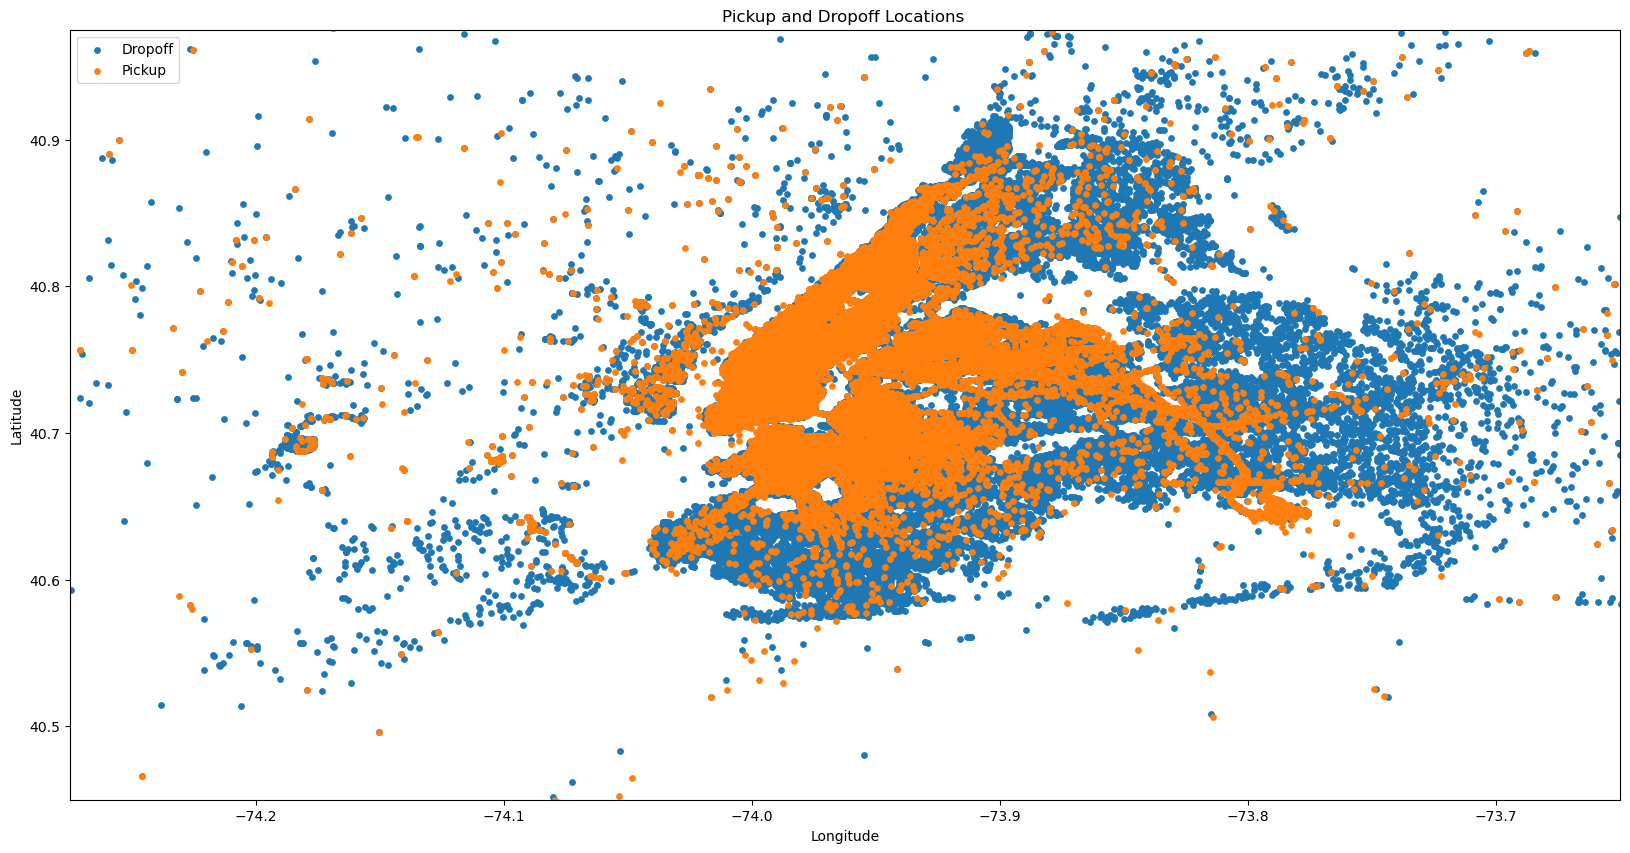

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], alpha=1, label='Dropoff', s=15)  # smaller size, transparency
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], alpha=1, label='Pickup', s=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations ')
plt.xlim([-74.275, -73.65])  
plt.ylim([40.45, 40.975]) #zoom 
_ = plt.legend()
plt.show()




>This gives a clear Graphical Representation of The Pickup and Drop Locations around New York City



**Although Drop Off Locations are scattered all around the city but, The Pick up Locations are Mostly from the Central City**.

**Hence - Availability of Taxi's in the Central City is highly Essential for Good Business**













---



---



*Using* **Date & Time** *as our Target Variable to Perform Analysis and draw Insights*

In [18]:
# Extract the hour from the 'pickup_datetime' column
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Convert 'trip_duration' from seconds to minutes
df['trip_duration_minutes'] = df['trip_duration'] / 60

# Group by 'pickup_hour' and calculate the mean 'trip_duration_minutes'
average_trip_time_by_hour = df.groupby('pickup_hour')['trip_duration_minutes'].mean().reset_index()

# Sort by 'pickup_hour'
average_trip_time_by_hour = average_trip_time_by_hour.sort_values('pickup_hour')

# Convert 'pickup_hour' to integers
average_trip_time_by_hour['pickup_hour'] = average_trip_time_by_hour['pickup_hour'].astype(int)


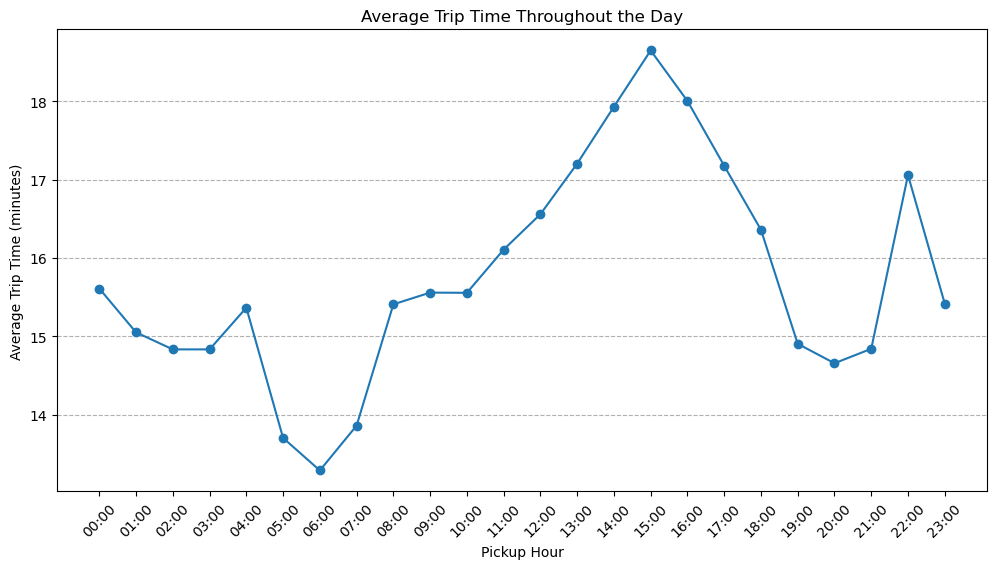

In [19]:
# Increase figure size
plt.figure(figsize=(12, 6))

# Create a line plot
plt.plot(average_trip_time_by_hour['pickup_hour'], average_trip_time_by_hour['trip_duration_minutes'], marker='o', linestyle='-')

# Set x-tick positions and labels
plt.xticks(average_trip_time_by_hour['pickup_hour'])
plt.xticks(average_trip_time_by_hour['pickup_hour'], [pd.to_datetime(hour, unit='h').strftime('%H:%M') for hour in average_trip_time_by_hour['pickup_hour']], rotation=45)

# Add labels and title
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Time (minutes)')
plt.title('Average Trip Time Throughout the Day')

# Show the plot
plt.grid(axis='y', linestyle='--')
plt.show()

**As we can see, People Boarding Taxi at 15:00 Hours are travelling for Longest Duratiion, This indicates there might be traffic at that time.**

**People tend to travel less during peek hours i.e Early Morning and Late Nights**.



---



In [20]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,trip_duration_minutes
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,7.583333
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,11.050000
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,35.400000
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,7.150000
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,7.250000


In [21]:
# Group by 'pickup_hour' and count the number of trips
trips_by_hour = df['pickup_hour'].value_counts().reset_index()
trips_by_hour.columns = ['pickup_hour', 'trip_count']

# Sort to find the most and least rush hours
most_rush_hours = trips_by_hour.sort_values('trip_count', ascending=False)
least_rush_hours = trips_by_hour.sort_values('trip_count', ascending=True)

# Print the top 5 most rush hours
print("Top 5 most rush hours:")
print(most_rush_hours.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the top 5 least rush hours
print("\nTop 5 least rush hours:")
print(least_rush_hours.head().to_markdown(index=False, numalign="left", stralign="left"))

Top 5 most rush hours:
| pickup_hour   | trip_count   |
|:--------------|:-------------|
| 18            | 90600        |
| 19            | 90308        |
| 21            | 84185        |
| 20            | 84072        |
| 22            | 80492        |

Top 5 least rush hours:
| pickup_hour   | trip_count   |
|:--------------|:-------------|
| 5             | 15002        |
| 4             | 15792        |
| 3             | 20895        |
| 2             | 27972        |
| 6             | 33248        |


**Top 5 Most and Least Rush Hour-Wise**

Text(0.5, 1.0, 'Rush Hours')

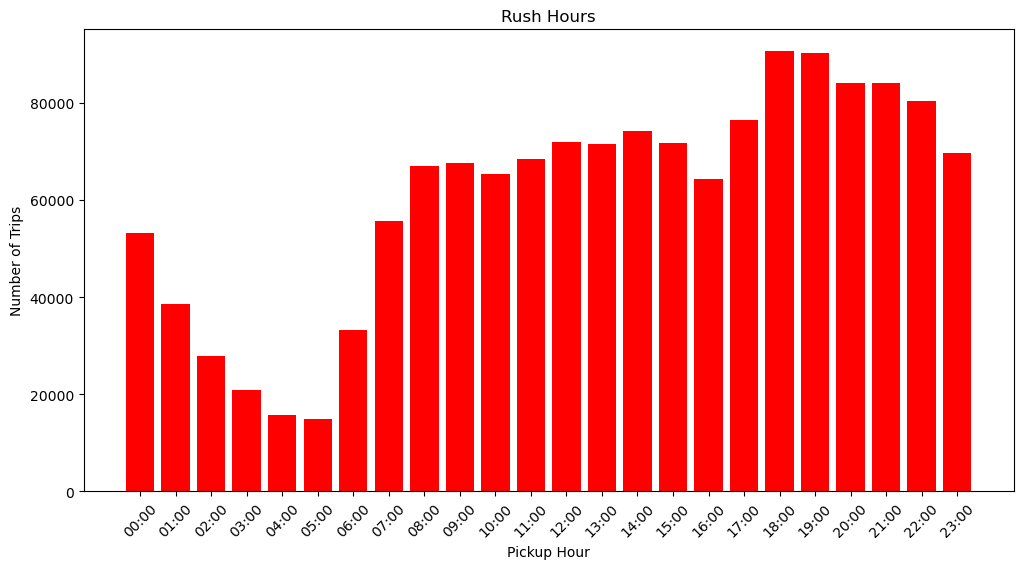

In [22]:
# Create a figure with two subplots sharing a y-axis
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), sharey=True)

# Plot for most rush hours
axes.bar(most_rush_hours['pickup_hour'], most_rush_hours['trip_count'], color='red')
axes.set_xticks(most_rush_hours['pickup_hour'])
axes.set_xticklabels([pd.to_datetime(hour, unit='h').strftime('%H:%M') for hour in most_rush_hours['pickup_hour']], rotation=45)
axes.set_xlabel('Pickup Hour')
axes.set_ylabel('Number of Trips')
axes.set_title('Rush Hours')







**We can Derive that 18:00 & 19:00 are most Rush Hours , Whereas 4:00 & 5:00 are least Rush Hours.**

**Although, 18:00 and 19:00  are very busy times to book a taxi, Based on the prevoius Observation, Hour 18 & 19 have one of the shortest Trip Duration.**


Hence, We can recommend people to travel during 4:00-5:00 Hours to avoid rush and even if you travel during the rush hours i.e 18:00-19:00, Don't Need to Worry as the Trip Duration during these are is generally low.